In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('font', family='sans-serif')

In [2]:
#匯入資料
df=pd.read_csv('https://www.post.gov.tw/post/internet/Templates/getOpenDataFile.jsp?vkey=B52AC0AE-DE29-48CE-A7EC-2FD8F682BBAE')
df.head()

,類別代號,類別,信筒樣式代號,信筒樣式,縣市,鄉鎮市區,村里,路名,地址描述,服務單位,聯絡電話,備註,x座標,y座標
0,4,普通信箱,1,單口,雲林縣,四湖鄉,蔡厝村,蔡厝路90號,南光國小前,四湖郵局,(05)7872045,,120.219304,23.613644
1,4,普通信箱,1,單口,新北市,瑞芳區,上天里,大寮路50號,NaN,瑞芳郵局,(02)24972158#12,,121.785519,25.102861
2,4,普通信箱,2,雙口,臺中市,太平區,光華里,大興路345號,NaN,太平宜欣郵局郵務股,(04)23982146#25,,120.737348,24.157364
3,7,限時信筒， 普通信筒,4,普通單口/限時單口,高雄市,路竹區,北嶺里,路科5路100號,NaN,路竹郵局,(07)6962311#16,,120.254936,22.842172
4,4,普通信箱,1,單口,宜蘭縣,冬山鄉,清溝村,義成路三段168號 (台電巷口),義成路三段168號斜對面,羅東郵局郵務股,(03)9561933,義成路三段台電巷口,121.768169,24.667953


In [3]:
#把城市名稱宣告成陣列
county = ['基隆市', '臺北市', '新北市', '桃園市', '新竹市', '新竹縣', '苗栗縣', '臺中市', '彰化縣', '南投縣', '雲林縣',
          '嘉義市', '嘉義縣', '臺南市', '高雄市', '屏東縣', '臺東縣', '花蓮縣', '宜蘭縣', '澎湖縣', '金門縣', '連江縣']
county_EN=['Keelung City','Taipei City', 'Hsinchu City', 'Taoyuan County', 'Hsinchu City', 'Hsinchu County', 'Miaoli County', 'Taichung City', 'Changhua County', 'Nantou County', 'Yunlin County',
          'Chiayi City', 'Chiayi County', 'Tainan City', 'Kaohsiung County', 'Pingtung County', 'Taitung County', 'Hualien County', 'Yilan County', 'Penghu County', 'Kinmen County', 'Lienchiang County']

In [4]:
df=df[['類別代號',' 縣市',' x座標',' y座標']]  #取出需要的資料
place=np.array(df)   #把Dataframe轉成array
Count_Arr=np.zeros(22)

print(place)
#把每筆資料做歸納
for j in range(len(place)):
    for i in range (22):
        if(place[j][1]==county[i]):
            Count_Arr[i]+=1

print(Count_Arr) #列印出來確認資料的正確性

[[4 '雲林縣' 120.21930400000001 23.613644]
 [4 '新北市' 121.785519 25.102860999999997]
 [4 '臺中市' 120.737348 24.157364]
 ...
 [3 '苗栗縣' 120.82078999999999 24.558414000000003]
 [3 '臺東縣' 121.40664 23.123085999999997]
 [5 '臺中市' 120.58671399999999 24.379518]]
[113. 747. 707. 282.  66. 109. 172. 652. 358. 217. 266.  48. 257. 437.
 437. 157. 140.  62. 179.  73.  19.  27.]


<BarContainer object of 22 artists>

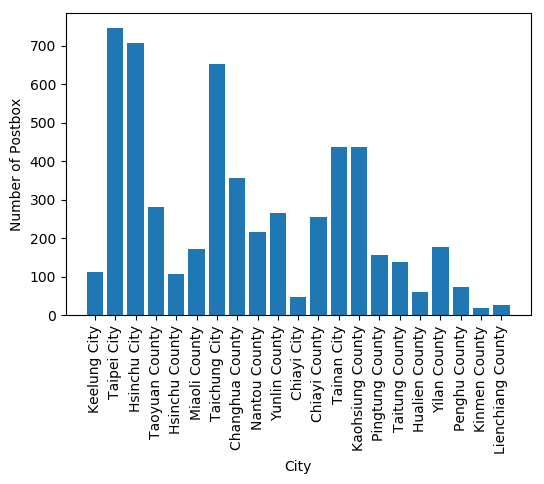

In [5]:
#畫成長條圖
plt.figure(dpi=100)
plt.xlabel("City")
plt.ylabel("Number of Postbox")
plt.xticks(rotation='vertical')
plt.bar(county_EN, Count_Arr)

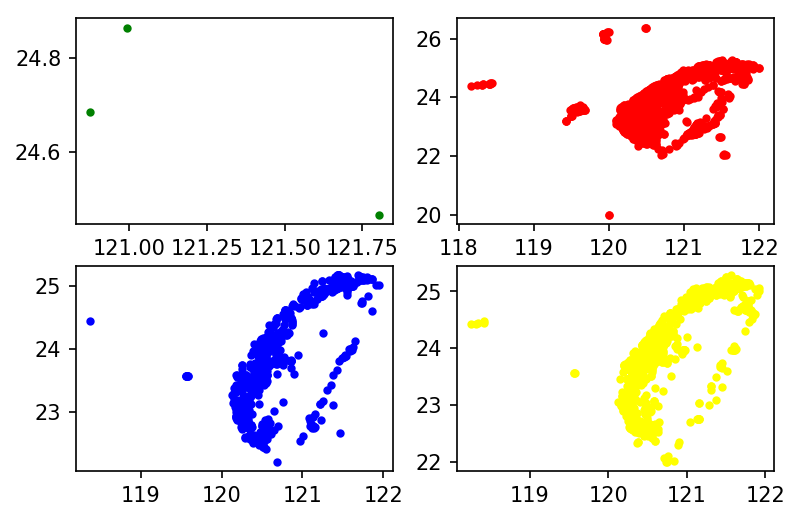

In [49]:
#宣告四種信箱的座標List
#綠色=限時信筒(箱)
#紅色=普通信筒(箱)
#藍色=限時普通雙用信筒(箱)
#黃色=限時信筒+普通信筒((箱)

gx_coordinate=[]
gy_coordinate=[]
rx_coordinate=[]
ry_coordinate=[]
bx_coordinate=[]
by_coordinate=[]
yx_coordinate=[]
yy_coordinate=[]

for j in range(len(place)):
    if((place[j][2]>10) & (place[j][3]>10)):
        
        if((place[j][0]==1) or (place[j][0]==2)):
            gx_coordinate.append(place[j][2])
            gy_coordinate.append(place[j][3])
        elif((place[j][0]==3) or (place[j][0]==4)):
            rx_coordinate.append(place[j][2])
            ry_coordinate.append(place[j][3])
        elif((place[j][0]==5) or (place[j][0]==6)):
            bx_coordinate.append(place[j][2])
            by_coordinate.append(place[j][3])
        elif((place[j][0]==7) or (place[j][0]==8)):
            yx_coordinate.append(place[j][2])
            yy_coordinate.append(place[j][3])
    else:
        if((place[j][0]==3) or (place[j][0]==4)):
            rx_coordinate.append(120)
            ry_coordinate.append(20)

#分別show出
plt.figure(dpi=150)
plt.subplot(221)
plt.plot(gx_coordinate,gy_coordinate,'.',color = "green")
plt.subplot(222)
plt.plot(rx_coordinate,ry_coordinate,'.',color = "red")
plt.subplot(223)
plt.plot(bx_coordinate,by_coordinate,'.',color = "blue")
plt.subplot(224)
plt.plot(yx_coordinate,yy_coordinate,'.',color = "yellow")